# itch_load_data_exp

In [1]:
import gzip
import pandas as pd
import csv

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(gzip.open('../itch_data/original_data_2016/20160307_AAPL.csv.gz', 'rt'))
data.head(10)

,Time,Ticker,Order,T,Shares,Price,MPID,X
0,14401574,AAPL,170282,S,2,1055500,NaN,Q
1,14401574,AAPL,170283,S,2,1065300,NaN,Q
2,14401574,AAPL,170284,S,2,1075200,NaN,Q
3,14401574,AAPL,170285,S,2,1045800,NaN,Q
4,14401574,AAPL,170286,B,2,988700,NaN,Q
5,14401574,AAPL,170287,B,2,971400,NaN,Q
6,14401575,AAPL,170291,B,2,997600,NaN,Q
7,14401575,AAPL,170323,B,2,980000,NaN,Q
8,14401575,AAPL,170324,B,2,962900,NaN,Q
9,14402315,AAPL,187842,B,25,880000,NaN,Q


In [3]:
data.tail(10)

,Time,Ticker,Order,T,Shares,Price,MPID,X
1315067,72000074,AAPL,312514456,D,0,0,NaN,Q
1315068,72000074,AAPL,312509338,D,0,0,NaN,Q
1315069,72000074,AAPL,312495517,D,0,0,NaN,Q
1315070,72000074,AAPL,312495021,D,0,0,NaN,Q
1315071,72000074,AAPL,312493981,D,0,0,NaN,Q
1315072,72000074,AAPL,312687849,D,0,0,NaN,Q
1315073,72000074,AAPL,312493700,D,0,0,NaN,Q
1315074,72000074,AAPL,312515223,D,0,0,NaN,Q
1315075,72000074,AAPL,312494517,D,0,0,NaN,Q
1315076,72000074,AAPL,312510352,D,0,0,NaN,Q


In [4]:
def milli2time(time):
    #milliseconds = time * 10 ** (-3) * (1/60) * (1/60)
    
    ms = (time % 1000)
    s = (time / 1000) % 60
    m = (time / (1000 * 60)) % 60
    h = (time / (1000 * 60 * 60)) % 24
    
    return '%d:%02d:%02d:%03d' % (h, m, s, ms)

def time2milli(hour, minute, seconds, milliseconds):
    h = hour * 60 * 60 * 10**3
    m = minute * 60 * 10**3
    s = seconds * 10**3
    return h + m + s + milliseconds

In [5]:
print('The first order is set at', milli2time(14401574), 'and the last one is set at ', milli2time(72000074))
print('The market opens at', time2milli(9,30,0,0), 'ms and ends at', time2milli(16,0,0,0), 'ms')

The first order is set at 4:00:01:574 and the last one is set at  20:00:00:074
The market opens at 34200000 ms and ends at 57600000 ms


In [6]:
print(time2milli(16,0,0,0) - time2milli(9,30,0,0))
print(milli2time(1))

23400000
0:00:00:001


In [7]:
x = data['Time']
y1 = data['Price'] / 10000
y2 = data['Shares']

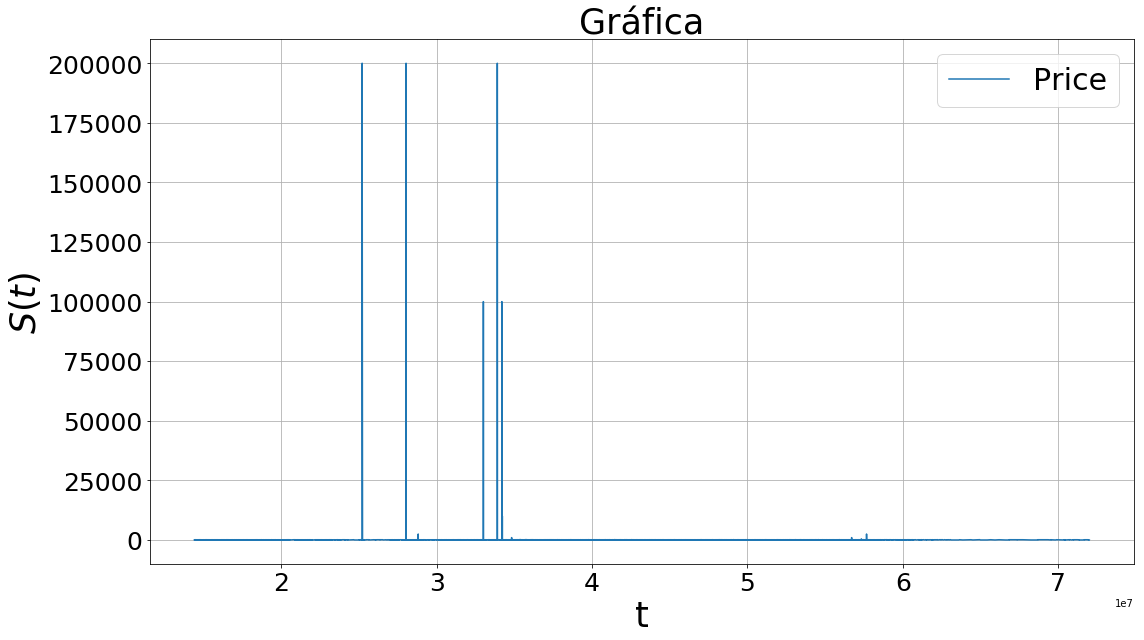

In [8]:
fig = plt.figure(figsize=(16,9))

plot = plt.plot(x, y1, '-', markersize=20)#, label=r'$Price \, vs. \, Time$')

plt.legend(loc=0, fontsize=30)
#plt.xlim()
#plt.ylim(0,0.15)

#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('t',fontsize=35)
plt.ylabel('$S(t)$',fontsize=35)
plt.title('Gráfica',fontsize=35)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True)
plt.tight_layout()
plt.show()

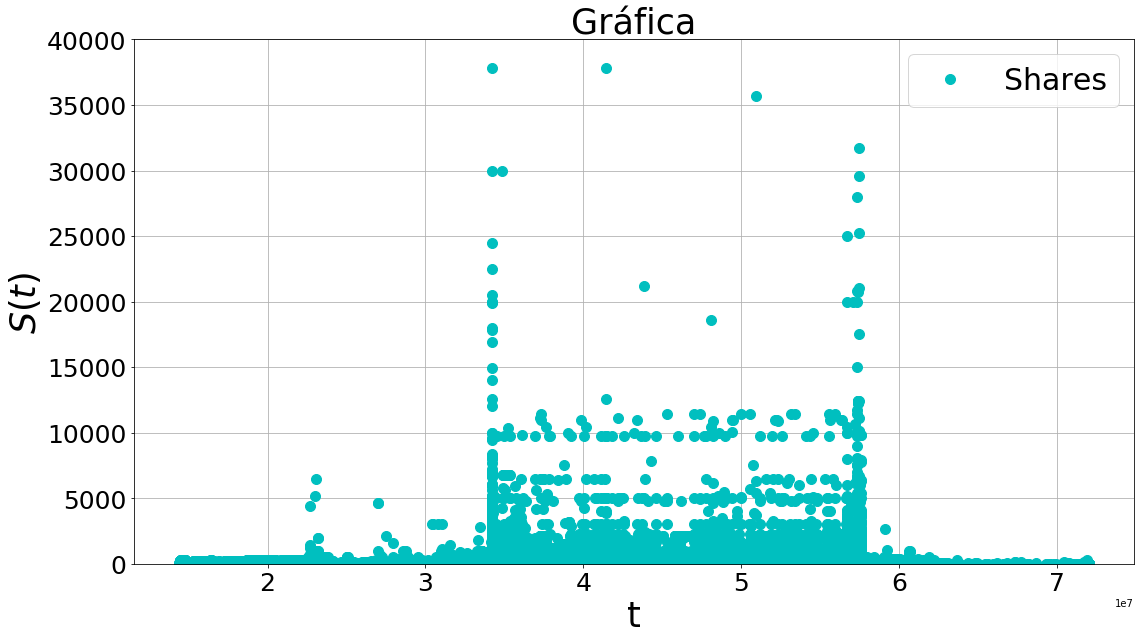

In [9]:
fig = plt.figure(figsize=(16,9))

plot = plt.plot(x, y2, '.c', markersize=20)#, label=r'$Price \, vs. \, Time$')

plt.legend(loc=0, fontsize=30)
#plt.xlim()
plt.ylim(0,40000)

#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('t',fontsize=35)
plt.ylabel('$S(t)$',fontsize=35)
plt.title('Gráfica',fontsize=35)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
data[data['T'] == 'B'].head()

,Time,Ticker,Order,T,Shares,Price,MPID,X
4,14401574,AAPL,170286,B,2,988700,NaN,Q
5,14401574,AAPL,170287,B,2,971400,NaN,Q
6,14401575,AAPL,170291,B,2,997600,NaN,Q
7,14401575,AAPL,170323,B,2,980000,NaN,Q
8,14401575,AAPL,170324,B,2,962900,NaN,Q


In [11]:
buy_order = data[data['T'] == 'B']
buy_order.shape

(338672, 8)

In [12]:
x_buy = buy_order['Time']
y_buy = buy_order['Price']

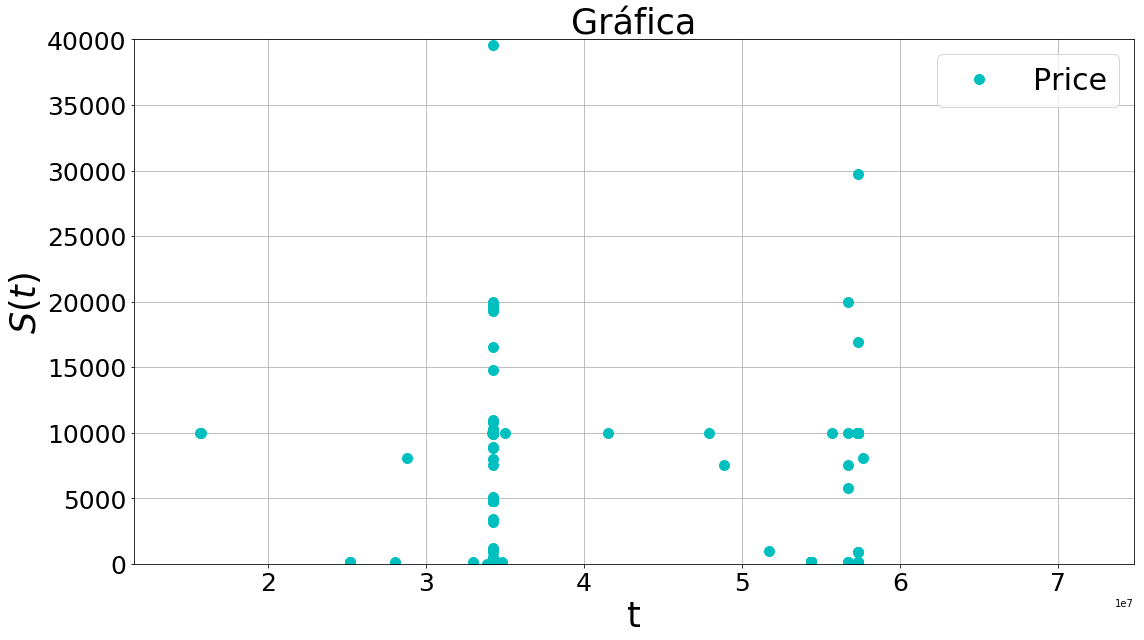

In [13]:
fig = plt.figure(figsize=(16,9))

plot = plt.plot(x_buy, y_buy, '.c', markersize=20)#, label=r'$Price \, vs. \, Time$')

plt.legend(loc=0, fontsize=30)
#plt.xlim()
plt.ylim(0,40000)

#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('t',fontsize=35)
plt.ylabel('$S(t)$',fontsize=35)
plt.title('Gráfica',fontsize=35)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
data[data['T'] == 'T'].head()

,Time,Ticker,Order,T,Shares,Price,MPID,X
12982,19211089,AAPL,0,T,19,1028100,NaN,Q
13301,19375863,AAPL,0,T,100,1025700,NaN,Q
13421,19625875,AAPL,0,T,100,1025800,NaN,Q
14394,20225250,AAPL,0,T,100,1025600,NaN,Q
16828,22672558,AAPL,0,T,100,1026200,NaN,Q


In [23]:
data[data['T'] == 'X']

,Time,Ticker,Order,T,Shares,Price,MPID,X
22345,34200343,AAPL,44413,X,345571,1025200,NaN,Q
1292634,57600445,AAPL,8537796,X,1258251,1018700,NaN,Q


In [55]:
expo = pd.DataFrame(data.iloc[8]).T
expo = expo.append(data.iloc[10])
expo = expo.append(data.iloc[12246])
expo = expo.append(data.iloc[57])
expo = expo.append(data.iloc[11812])
expo = expo.append(data.iloc[21])
expo = expo.append(data.iloc[16828])

In [57]:
expo[['Time', 'Ticker', 'Order', 'T', 'Shares', 'Price']]

,Time,Ticker,Order,T,Shares,Price
8,14401575,AAPL,170324,B,2,962900
10,14471727,AAPL,262209,S,200,1029900
12246,18974415,AAPL,723742,E,53,0
57,14492932,AAPL,264156,C,100,0
11812,18896401,AAPL,723591,F,0,0
21,14480189,AAPL,263011,D,0,0
16828,22672558,AAPL,0,T,100,1026200
